In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

In [3]:
df= pd.read_csv('stage2.csv', index_col=0)

In [4]:
df['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel',
 

In [5]:
China= df[df['Entity'] == 'China'].drop(['Entity','Year'],axis=1)
India= df[df['Entity'] == 'India'].drop(['Entity','Year'],axis=1)
USA= df[df['Entity'] == 'United States'].drop(['Entity','Year'],axis=1)

<AxesSubplot:>

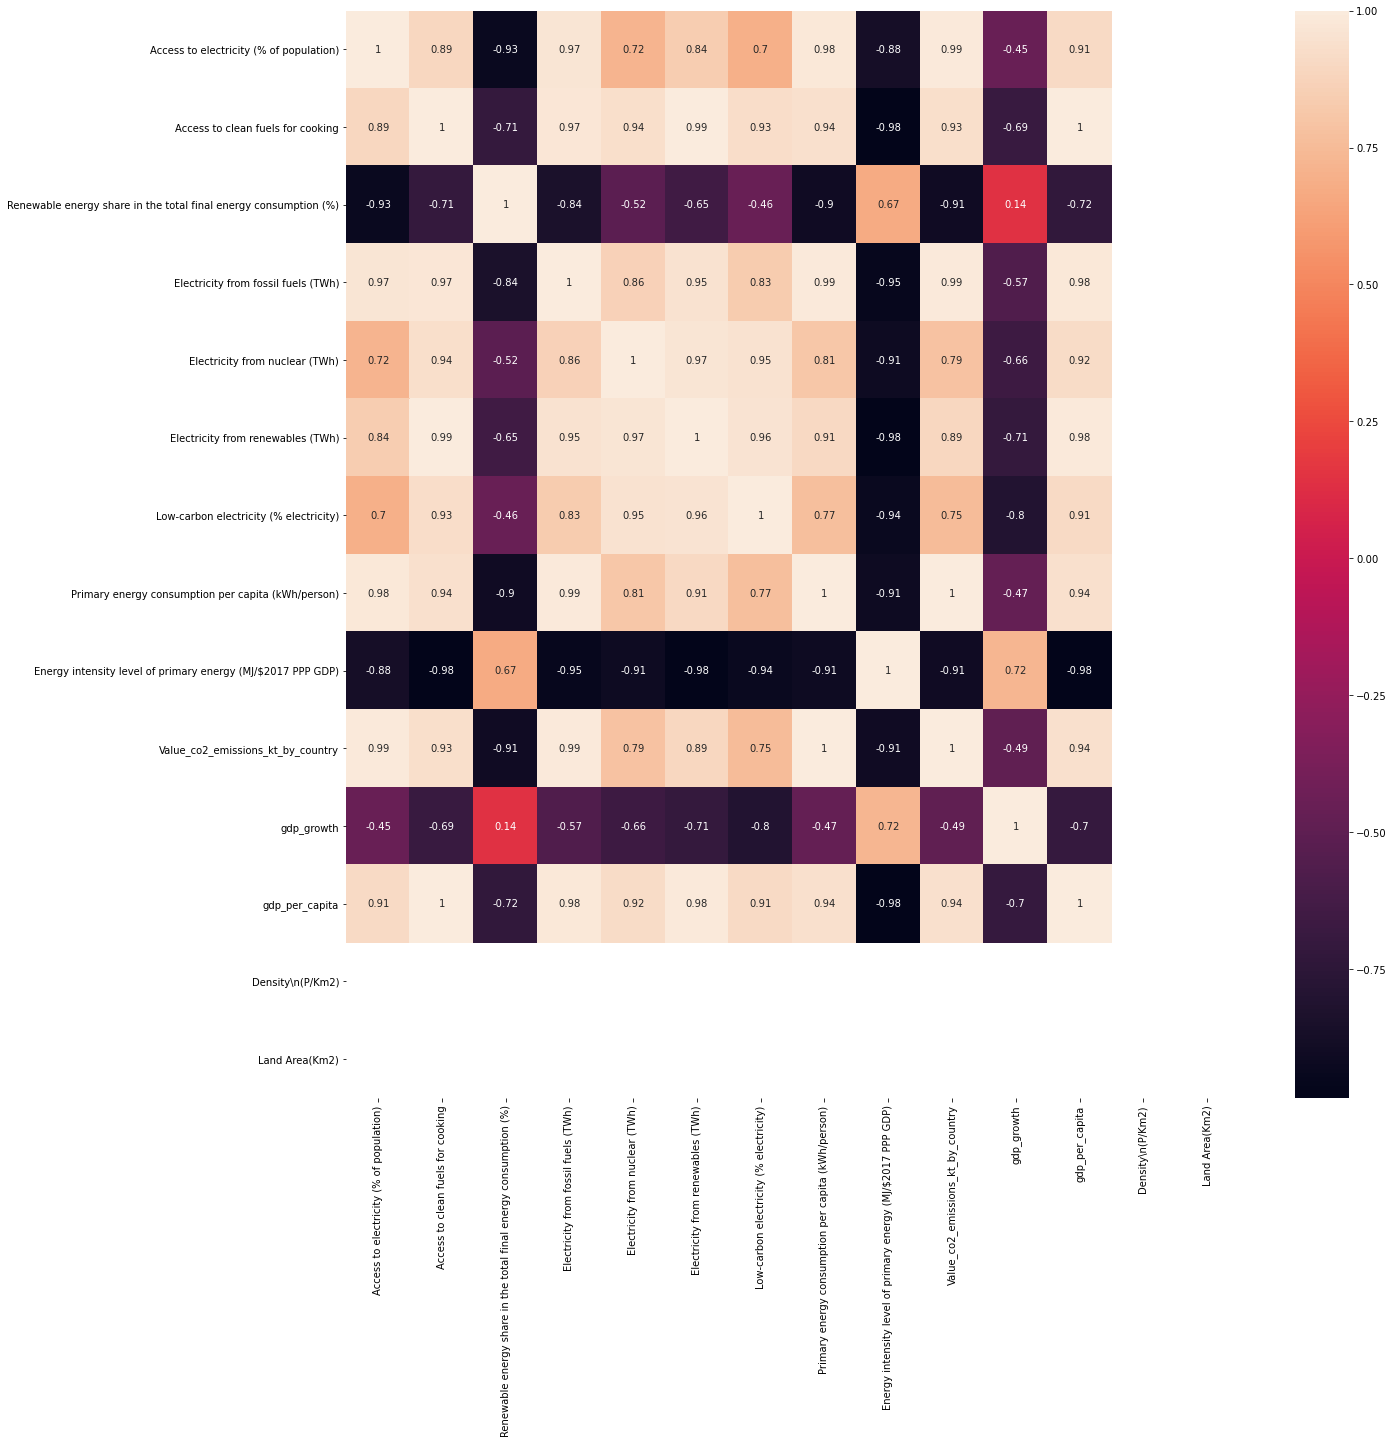

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(China.corr(),annot= True,)

<AxesSubplot:>

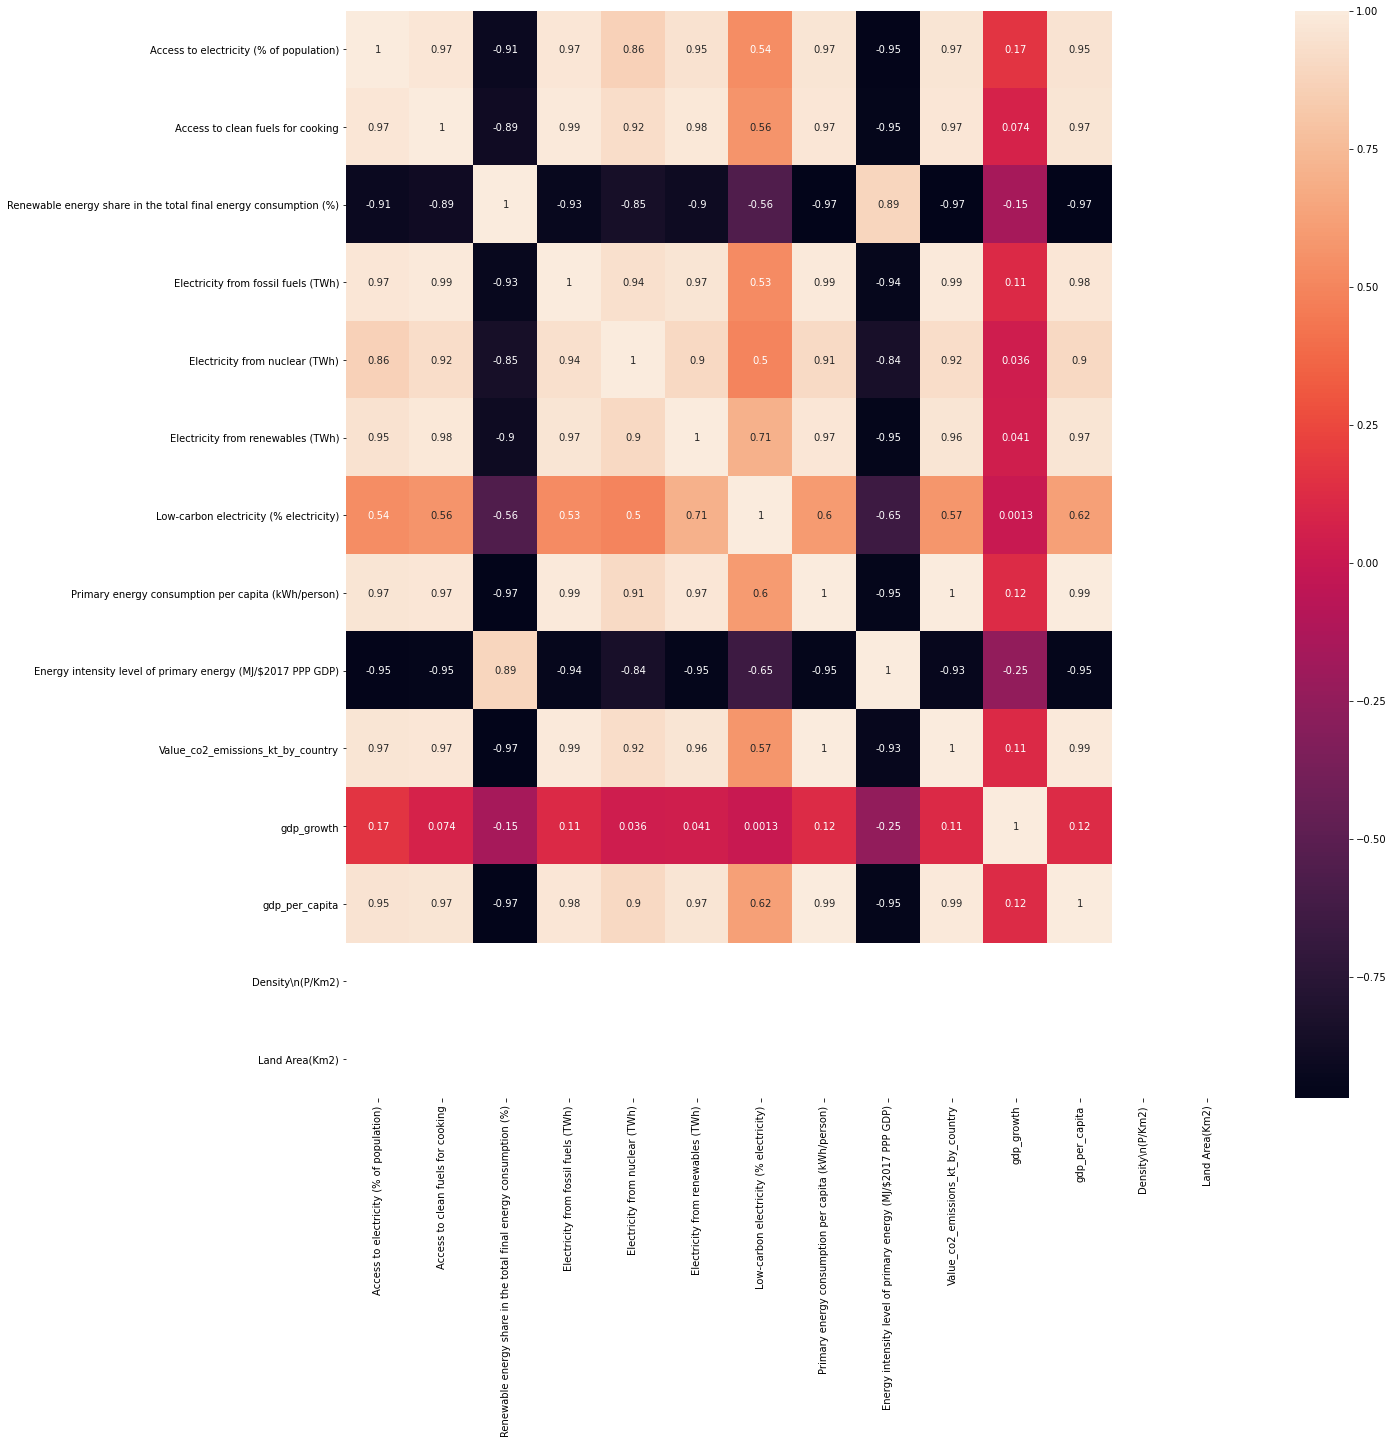

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(India.corr(),annot= True)

<AxesSubplot:>

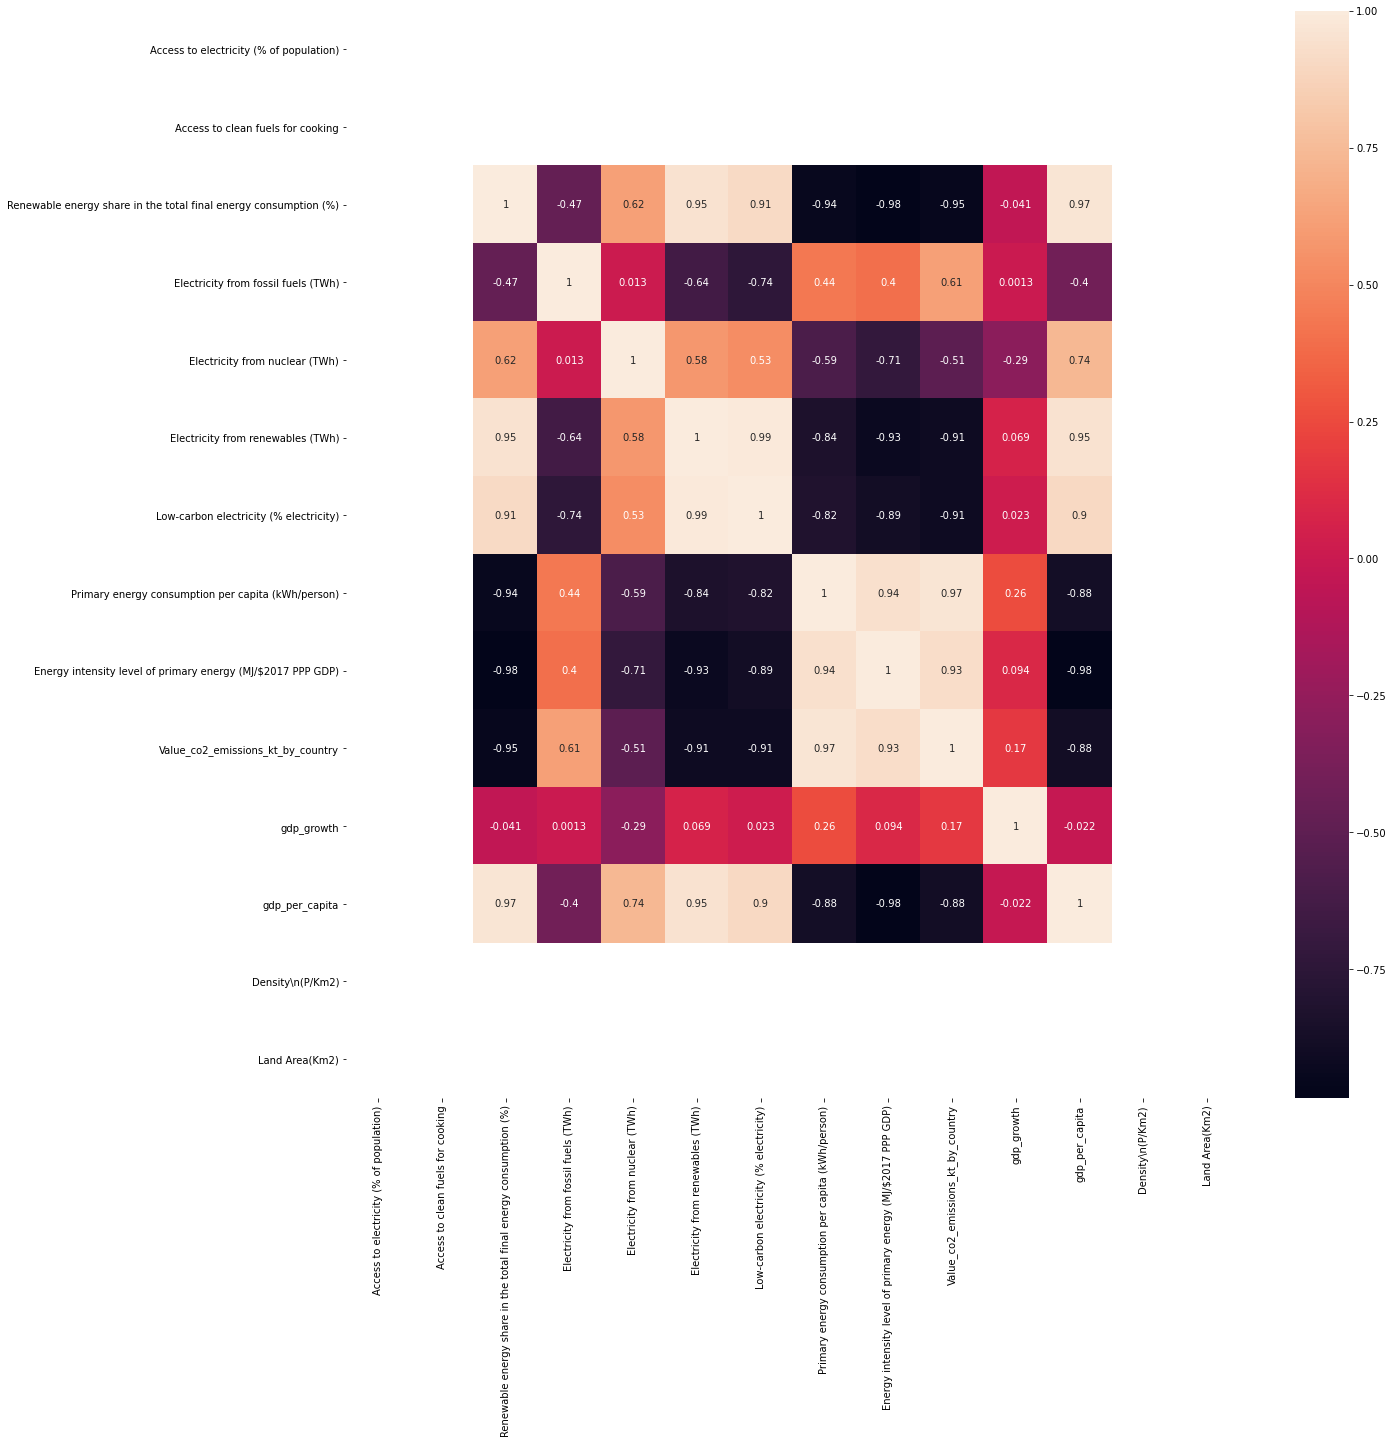

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(USA.corr(),annot= True)

/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

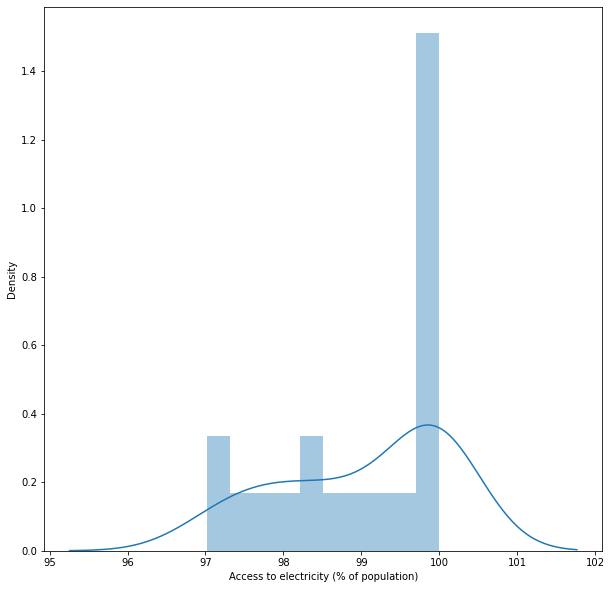

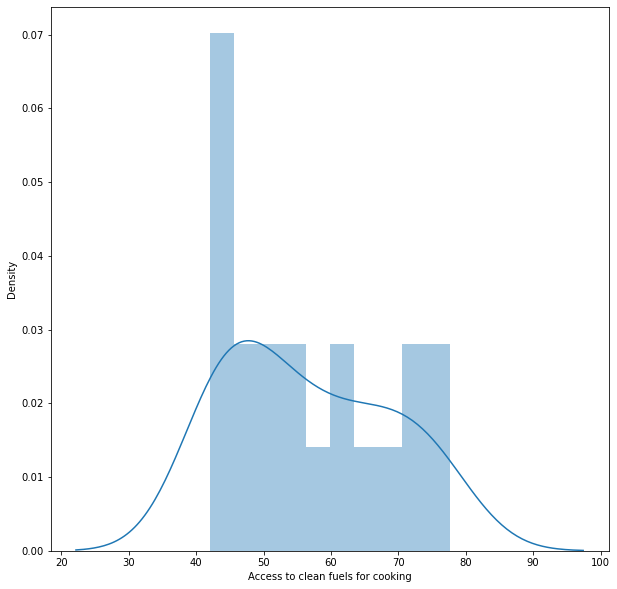

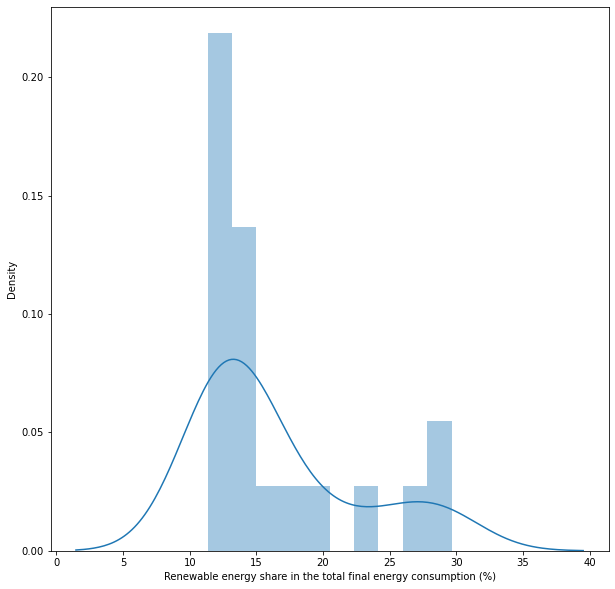

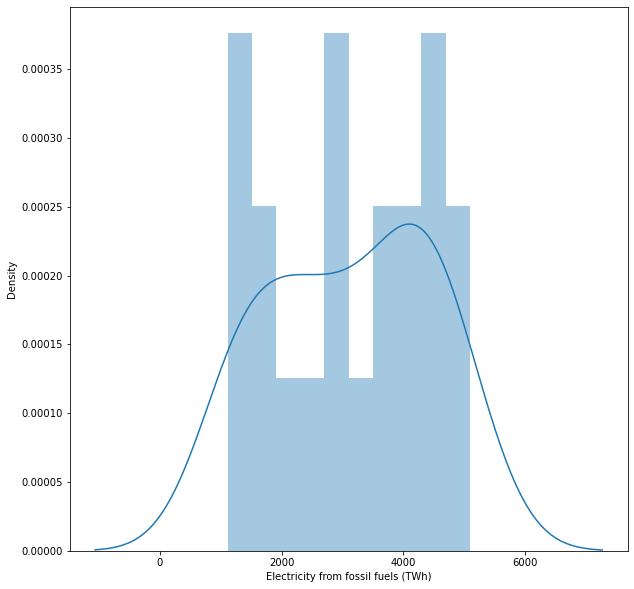

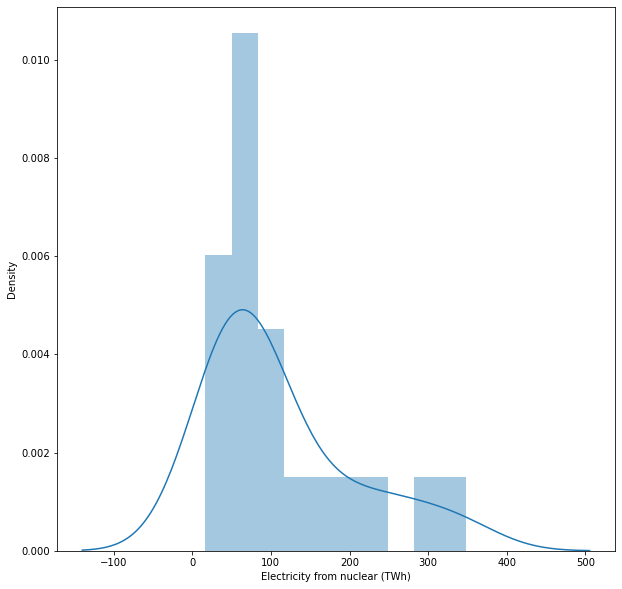

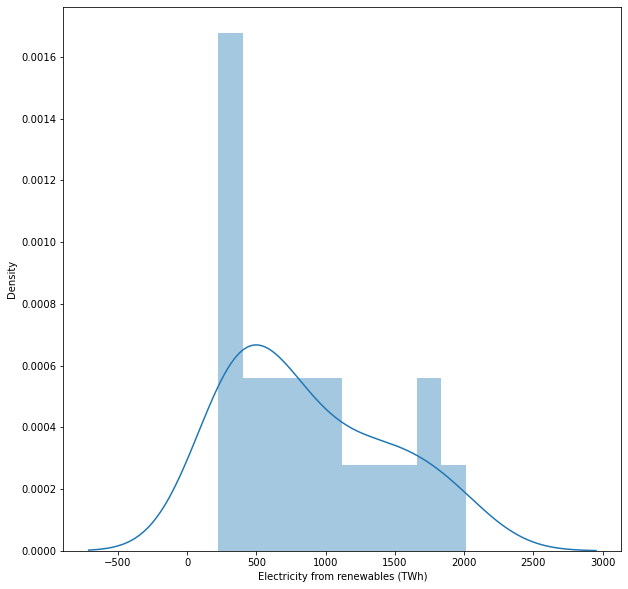

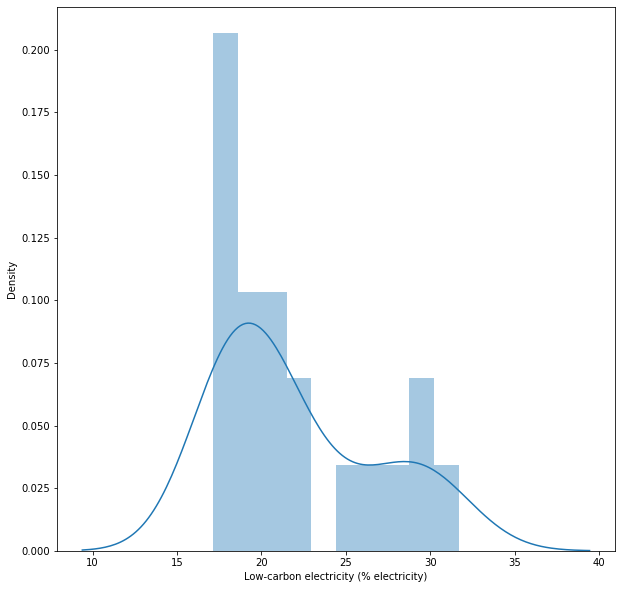

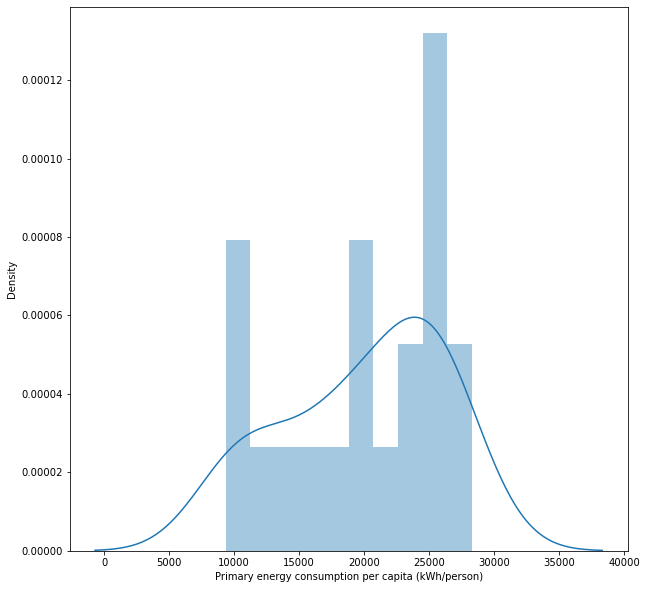

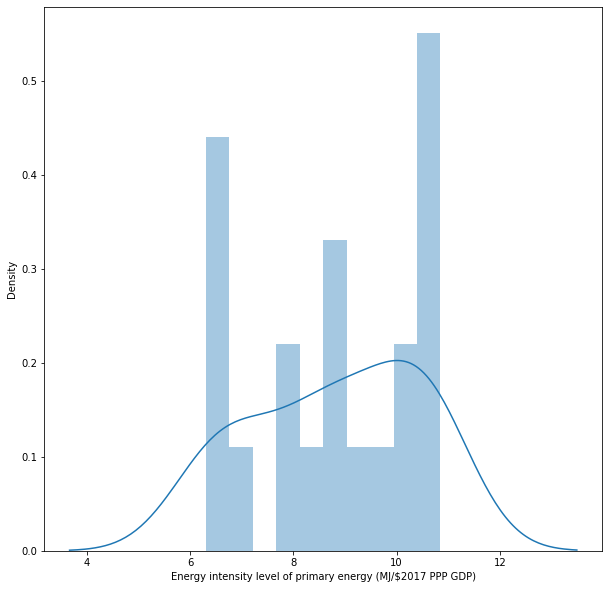

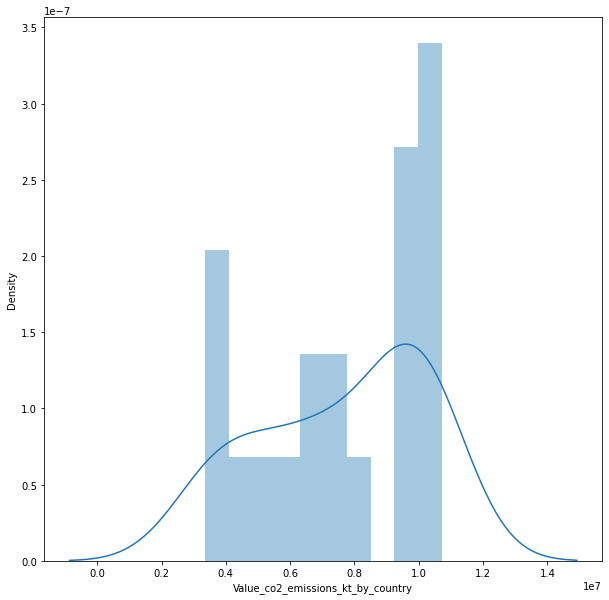

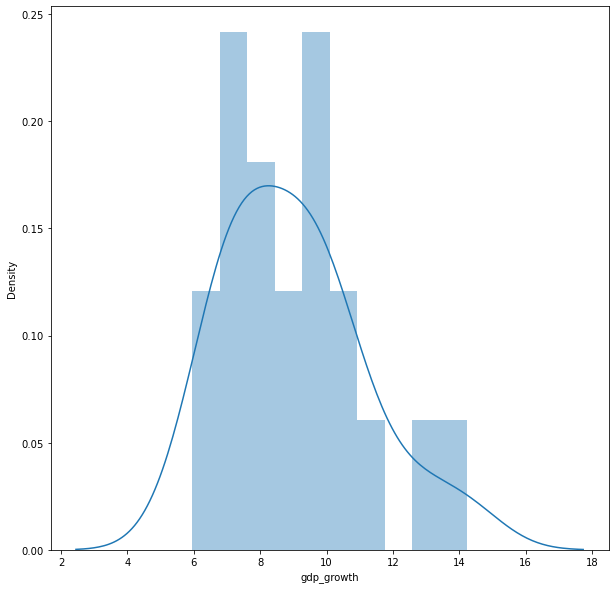

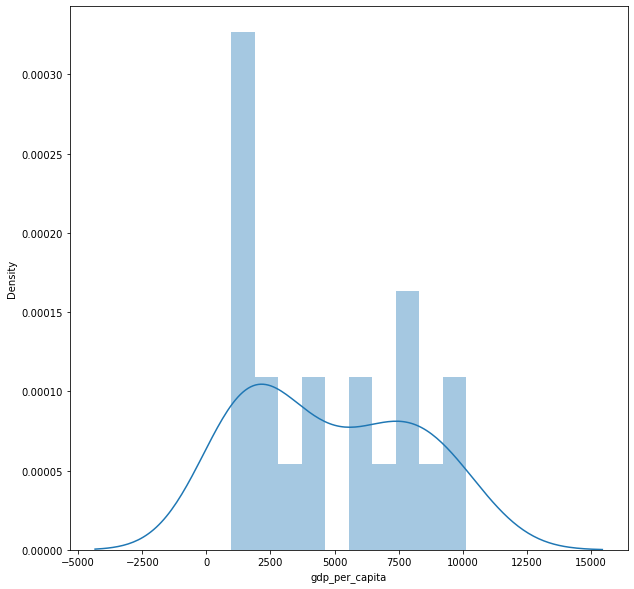

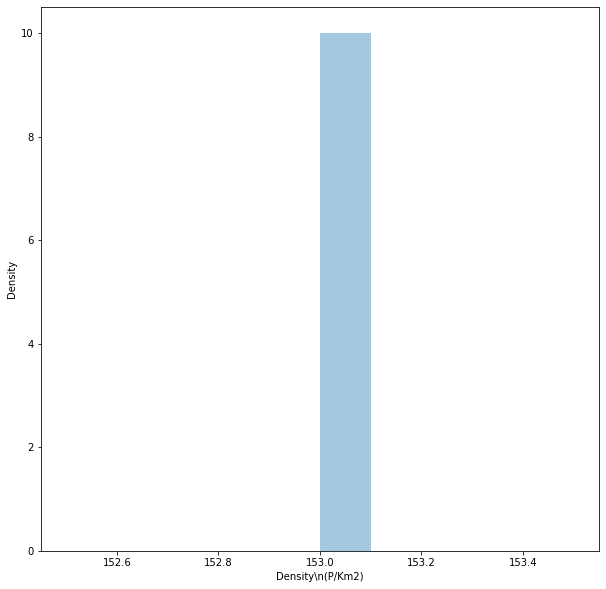

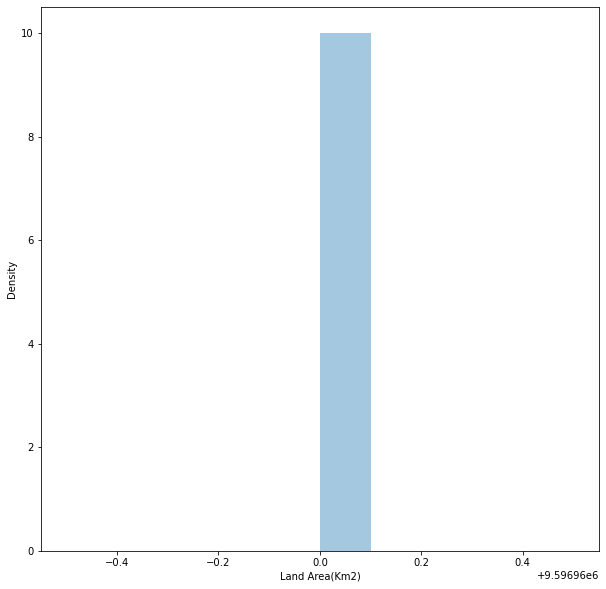

In [9]:
columns= China.columns
for i in columns:
    plt.figure(figsize=(10,10))
    sns.distplot(China[i],bins=10)

   

/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

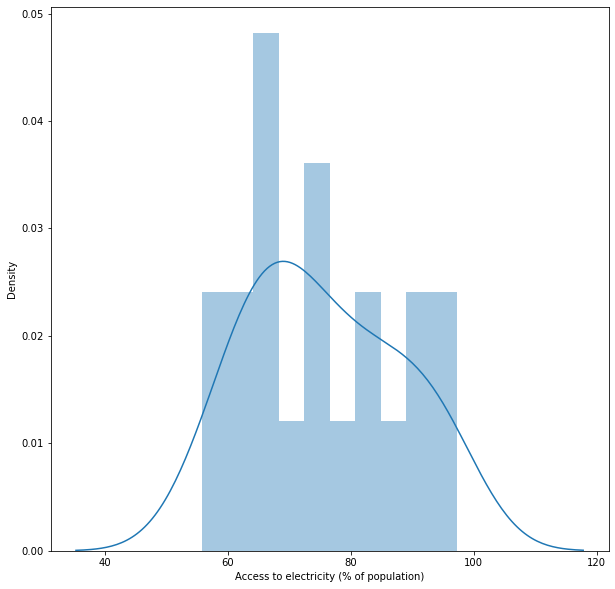

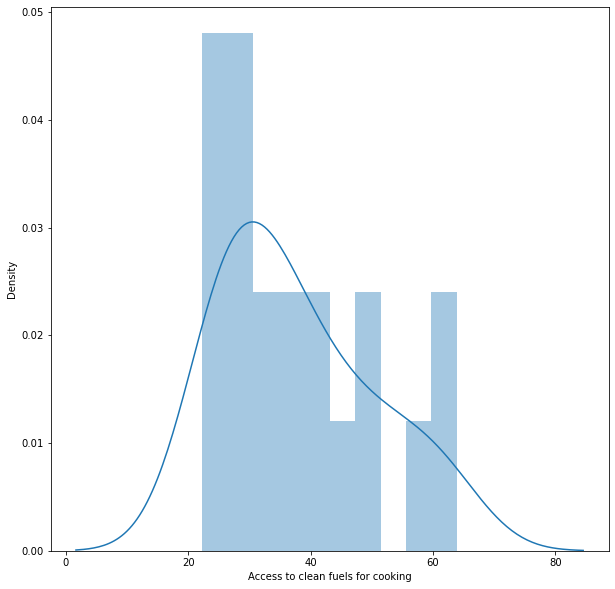

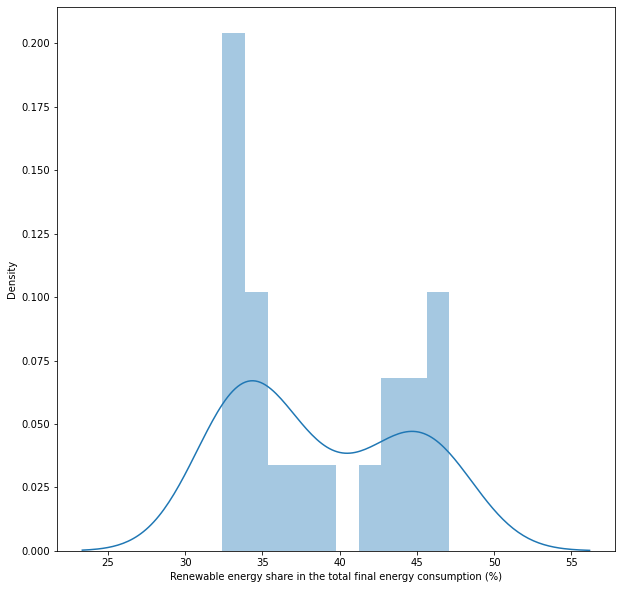

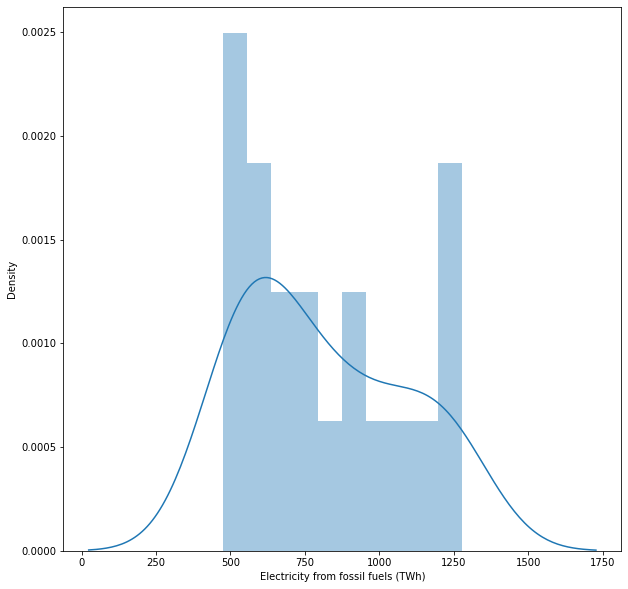

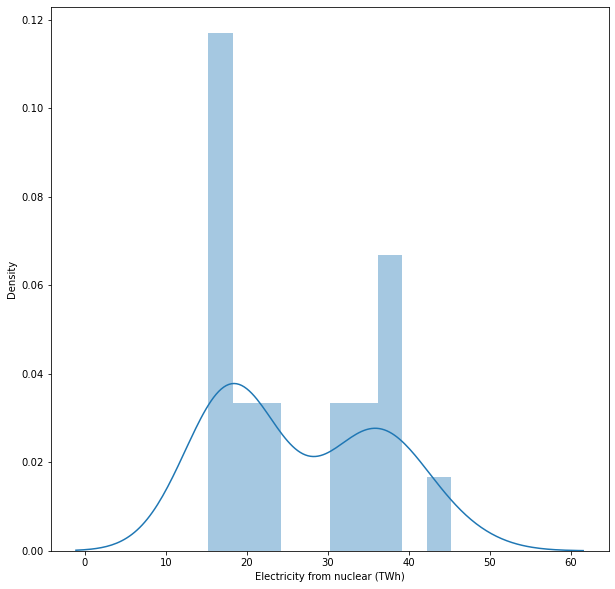

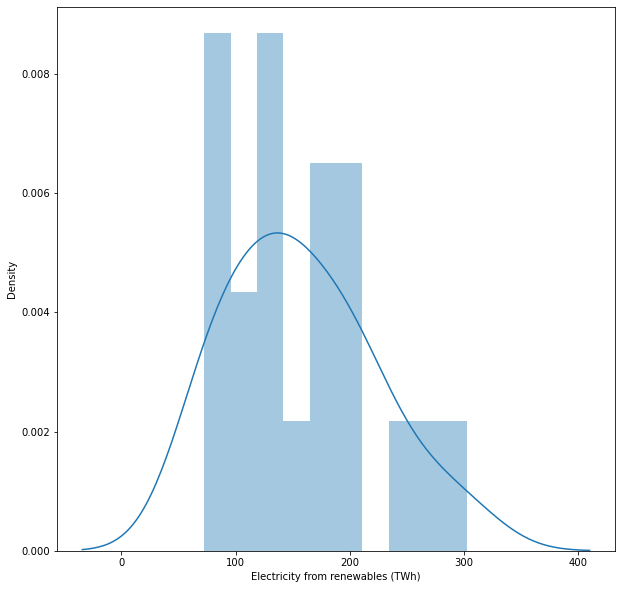

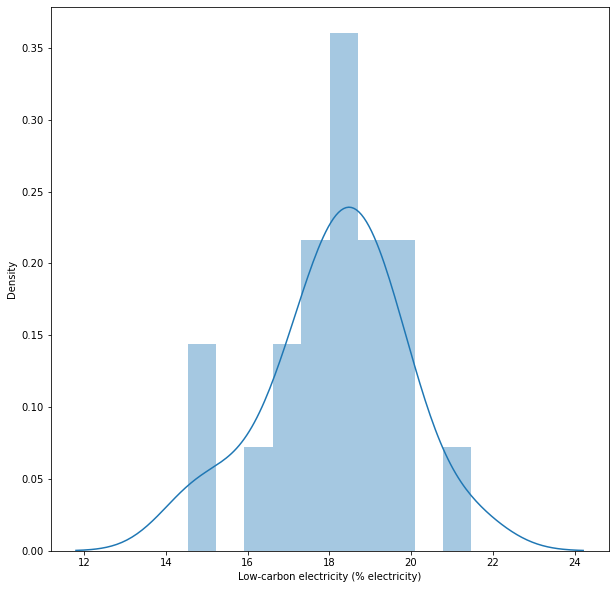

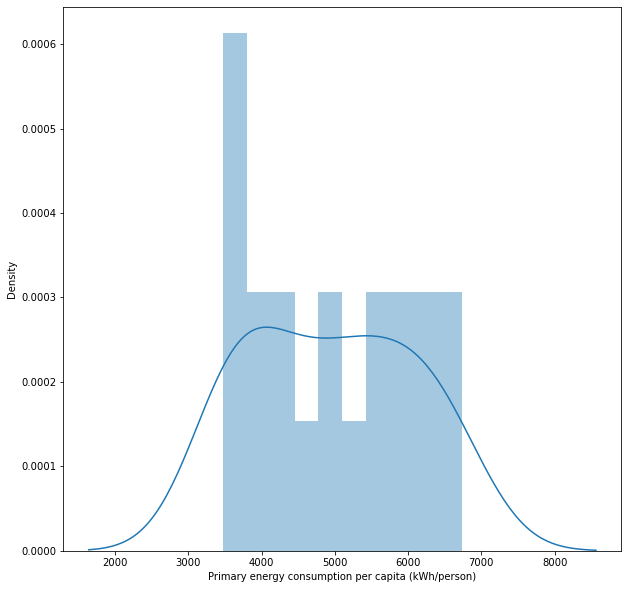

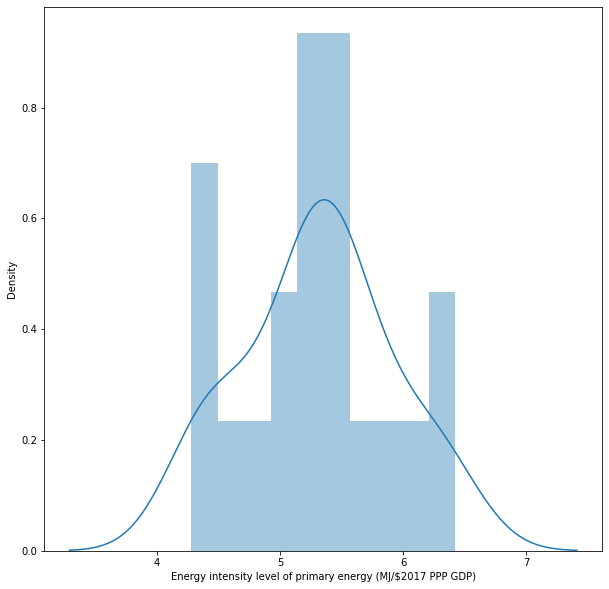

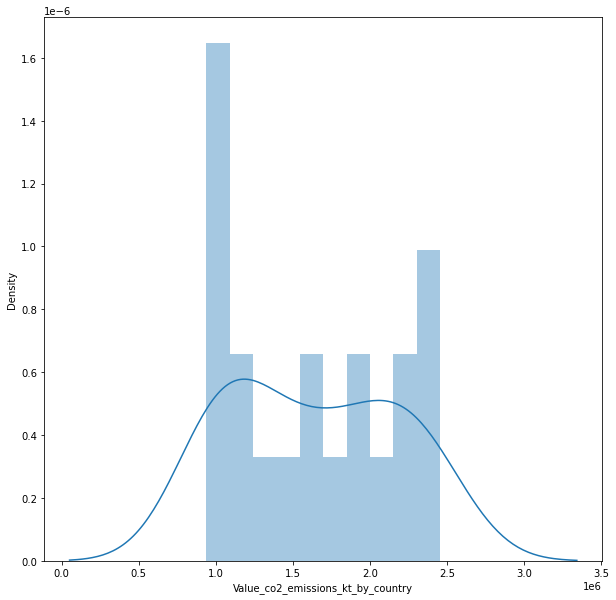

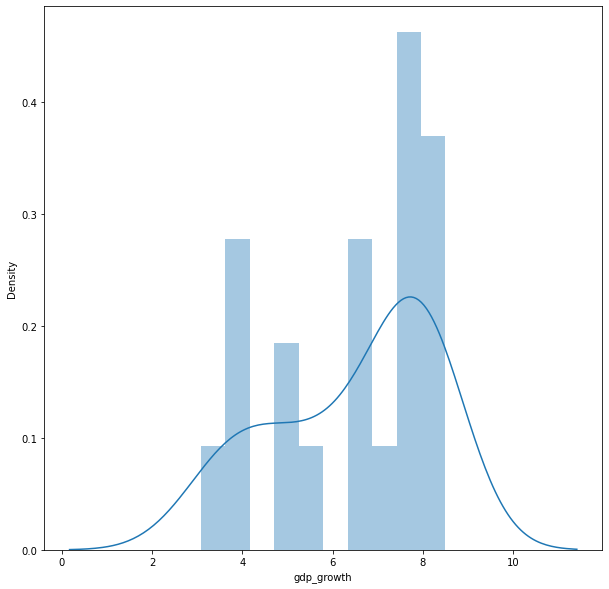

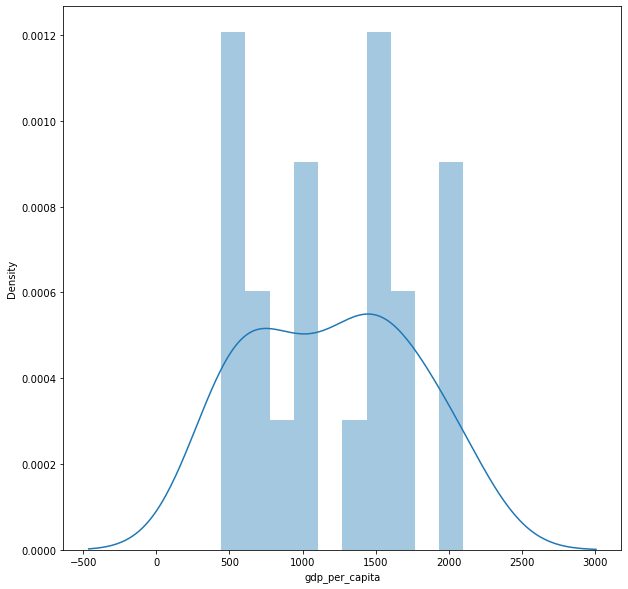

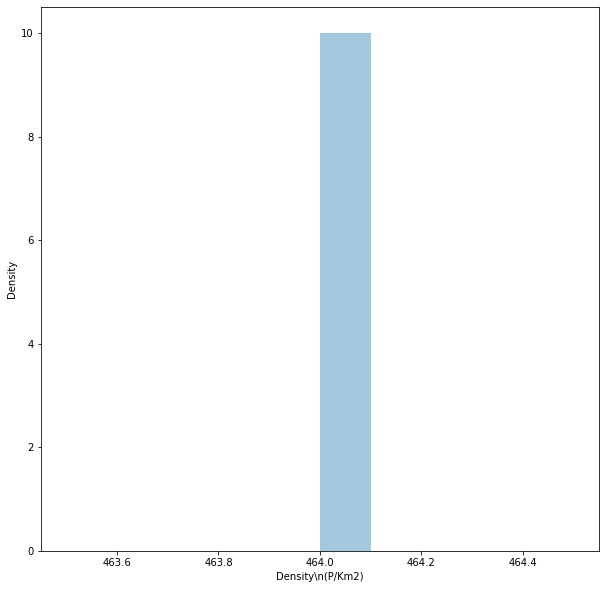

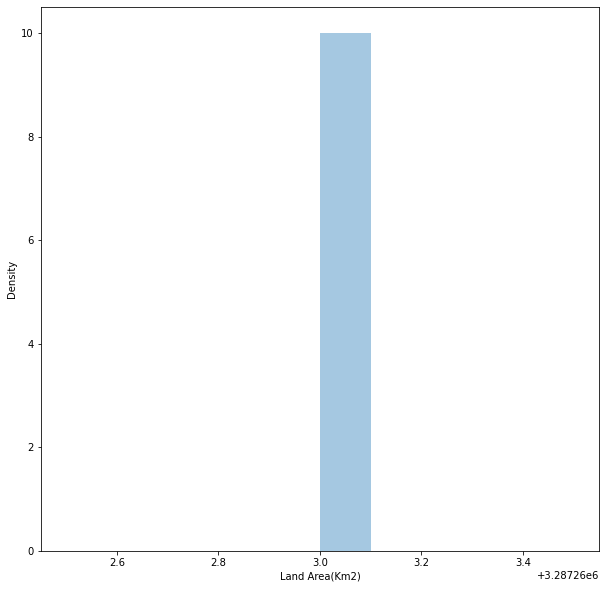

In [10]:
columns= India.columns
for i in columns:
    plt.figure(figsize=(10,10))
    sns.distplot(India[i],bins=10)


/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seab

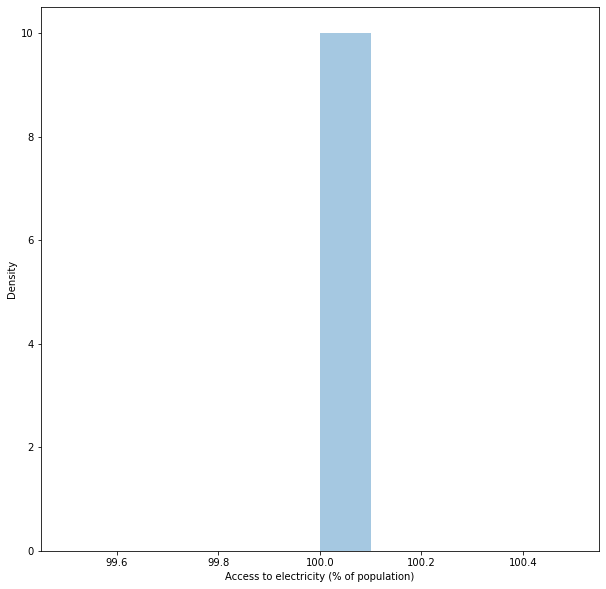

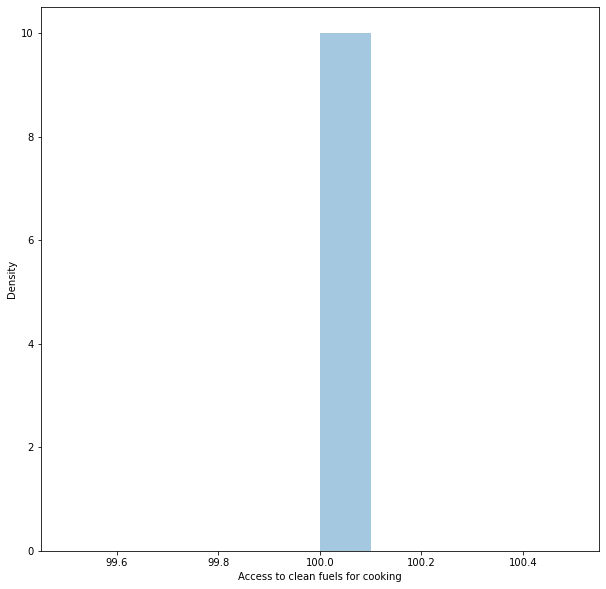

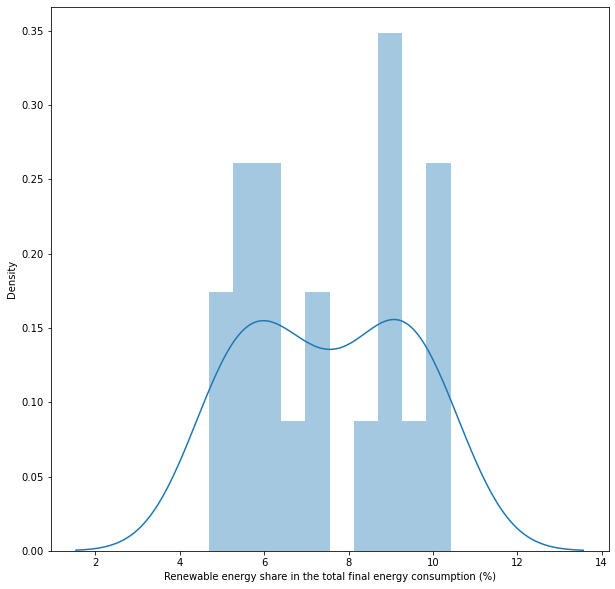

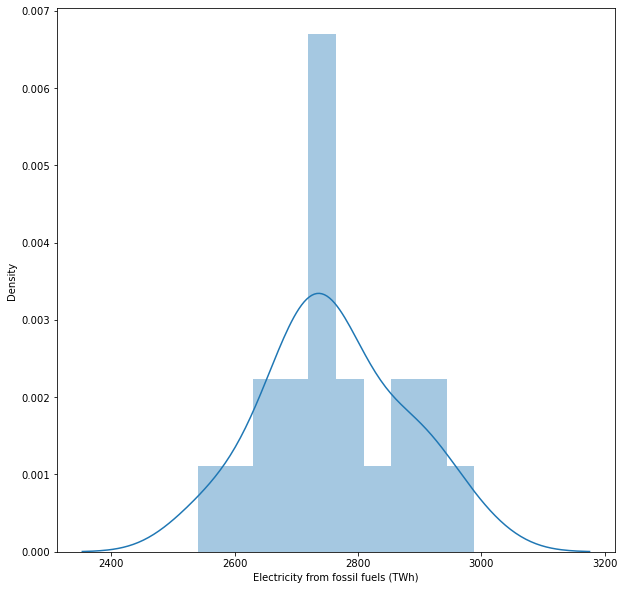

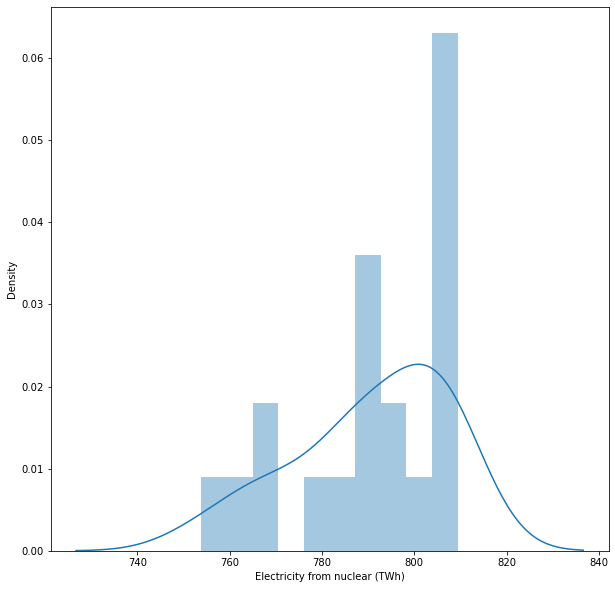

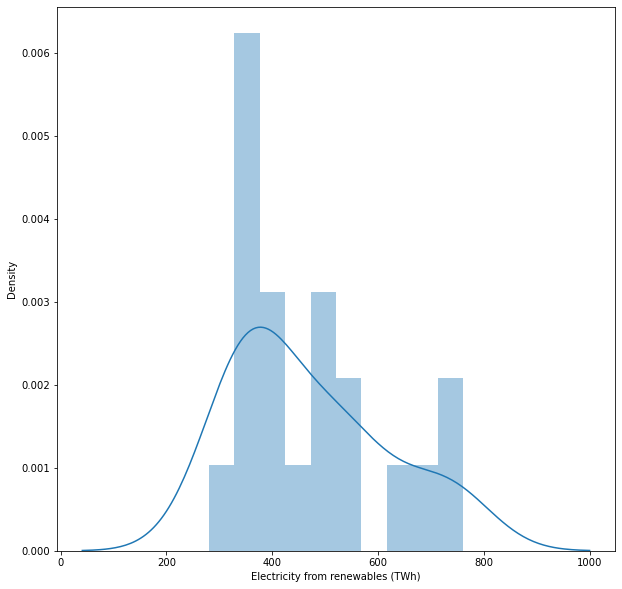

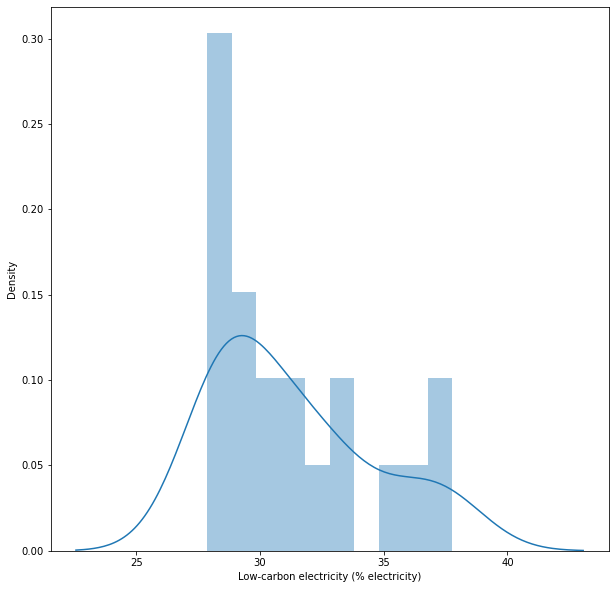

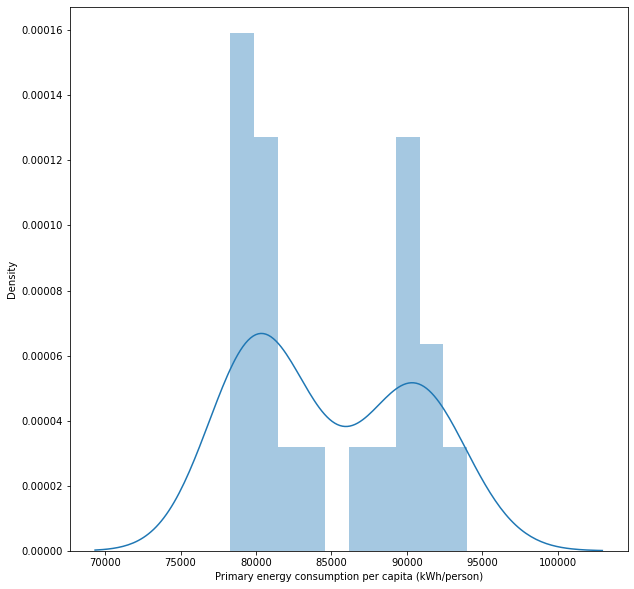

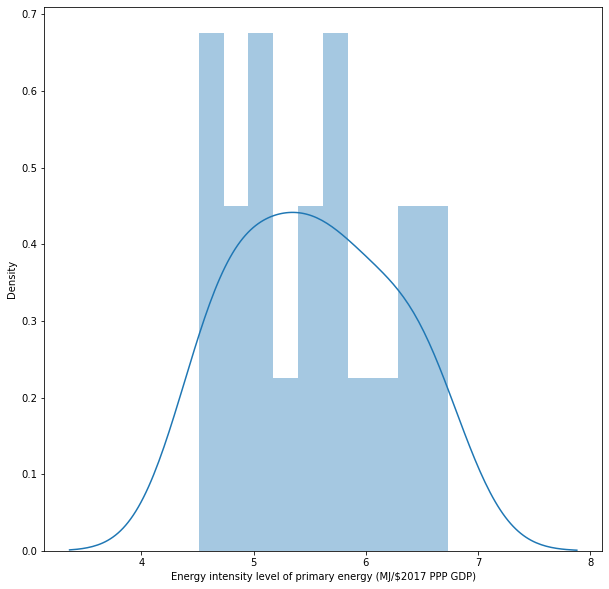

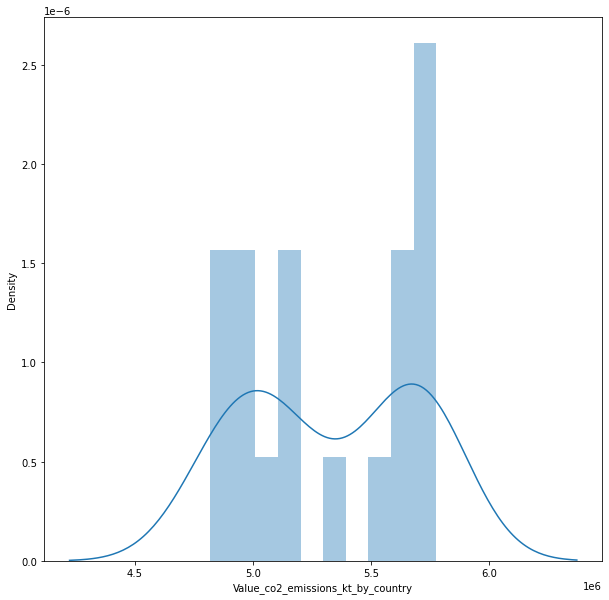

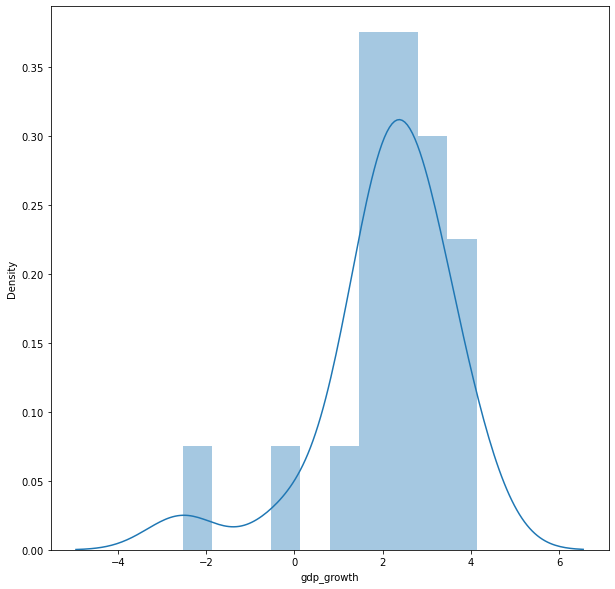

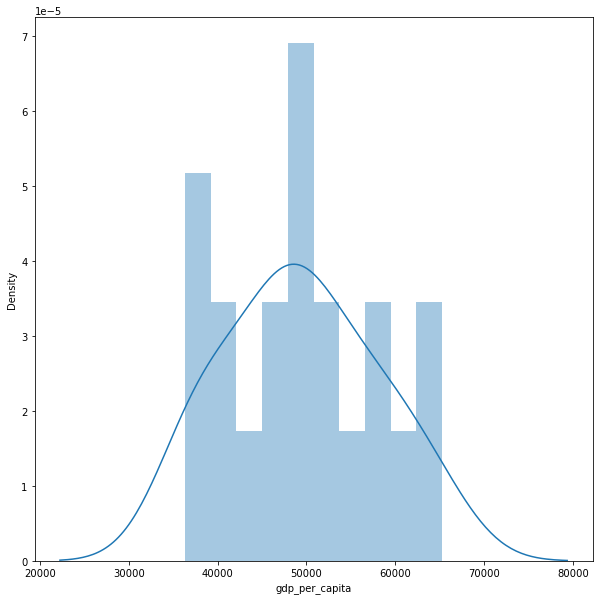

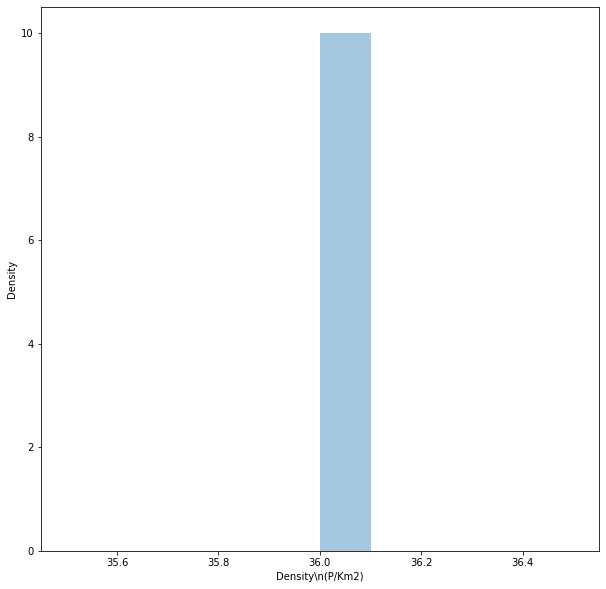

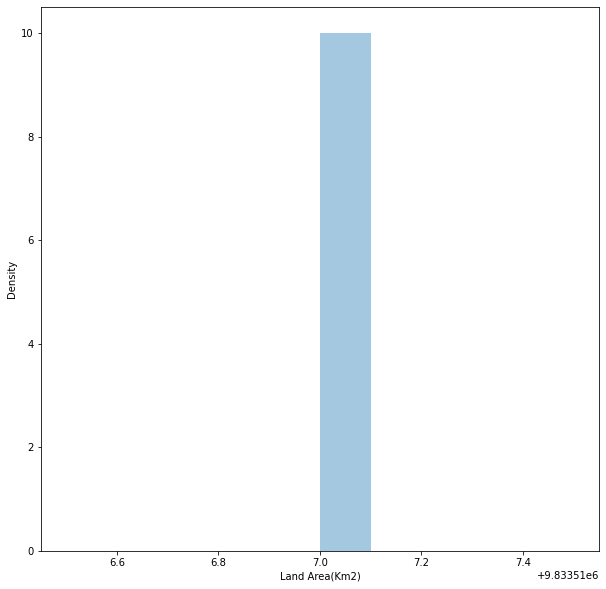

In [11]:
columns= USA.columns
for i in columns:
    plt.figure(figsize=(10,10))
    sns.distplot(USA[i],bins=10)

In [12]:
China.corr()['Value_co2_emissions_kt_by_country'].sort_values()

Energy intensity level of primary energy (MJ/$2017 PPP GDP)        -0.906249
Renewable energy share in the total final energy consumption (%)   -0.905177
gdp_growth                                                         -0.491856
Low-carbon electricity (% electricity)                              0.753371
Electricity from nuclear (TWh)                                      0.786816
Electricity from renewables (TWh)                                   0.893955
Access to clean fuels for cooking                                   0.934564
gdp_per_capita                                                      0.944273
Electricity from fossil fuels (TWh)                                 0.988776
Access to electricity (% of population)                             0.990871
Primary energy consumption per capita (kWh/person)                  0.996374
Value_co2_emissions_kt_by_country                                   1.000000
Density\n(P/Km2)                                                         NaN

In [13]:
X= China.drop(['Value_co2_emissions_kt_by_country','Density\\n(P/Km2)','Land Area(Km2)'],axis=1)
y= China['Value_co2_emissions_kt_by_country']

In [14]:







# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)







In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Perform Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value
ridge_model.fit(X_train_scaled, y_train)
ridge_predictions = ridge_model.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print("Ridge MSE:", ridge_mse)

Ridge MSE: 24921316058.89015


In [17]:
# Perform Lasso Regression
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha value
lasso_model.fit(X_train_scaled, y_train)
lasso_predictions = lasso_model.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print("Lasso MSE:", lasso_mse)


Lasso MSE: 5687839418.518448


In [18]:
# Print coefficients for Ridge and Lasso models
print("Ridge Coefficients:", ridge_model.coef_)
print("Lasso Coefficients:", lasso_model.coef_)

Ridge Coefficients: [ 444788.11083186  228446.33954921 -417889.44870854  394977.60161584
  -38156.9376017   129544.05764449 -126893.69980919  386637.46235146
  -81538.18965879  -32326.90660292  303558.31277422]
Lasso Coefficients: [ 413630.40082391  922966.70493421    7229.12029262  986139.28539041
 -324477.86156926  -31472.30384298 -127682.78323075  914837.49931946
  238581.46057267  -68601.80682196 -441140.55058944]


In [19]:
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2)
0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,3.861703,4413.062005,60.0,652230.0
1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,3.861703,4413.062005,60.0,652230.0
2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,3.861703,179.426579,60.0,652230.0
3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0
4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,Zimbabwe,2015,33.700000,29.5,80.82,4.02,0.0,5.37,57.188496,3860.92020,10.36,12430.000310,1.779873,1445.069702,38.0,390757.0
3644,Zimbabwe,2016,42.561730,29.8,81.90,3.50,0.0,3.32,48.680350,3227.68020,10.00,11020.000460,0.755869,1464.588957,38.0,390757.0
3645,Zimbabwe,2017,44.178635,29.8,82.46,3.05,0.0,4.30,58.503407,3068.01150,9.51,10340.000150,4.709492,1235.189032,38.0,390757.0
3646,Zimbabwe,2018,45.572647,29.9,80.23,3.73,0.0,5.46,59.412407,3441.98580,9.83,12380.000110,4.824211,1254.642265,38.0,390757.0


/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Value_co2_emissions_kt_by_country', ylabel='Density'>

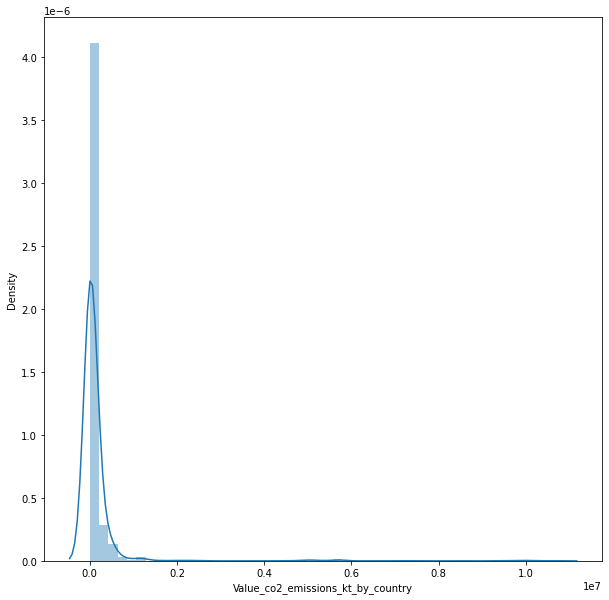

In [20]:
plt.figure(figsize= (10,10))
sns.distplot(df['Value_co2_emissions_kt_by_country'])

In [41]:
df= pd.read_csv('stage2.csv', index_col=0)

In [42]:
Q1= df['Value_co2_emissions_kt_by_country'].quantile(0.25)
Q3= df['Value_co2_emissions_kt_by_country'].quantile(0.75)
IQR= Q3-Q1
LB= Q1-1.5*IQR
UB= Q3+1.5*IQR

In [43]:
df= df[(df['Value_co2_emissions_kt_by_country']>LB) & (df['Value_co2_emissions_kt_by_country']<UB) ]

<Figure size 720x720 with 0 Axes>

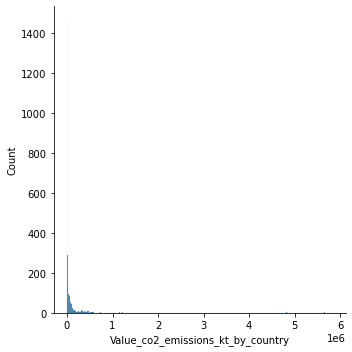